In [67]:
#linear algebra
import numpy as np

#data preprocessing
import pandas as pd

#data visualization
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [68]:
test_df = pd.read_csv(r'C:\Users\Asus\Desktop\Data_Science\Dataset\test.csv')
train_df = pd.read_csv(r'C:\Users\Asus\Desktop\Data_Science\Dataset\train.csv')

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [72]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = (train_df.isnull().sum()/train_df.isnull().count())*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [73]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Text(0.5, 1.0, 'male')

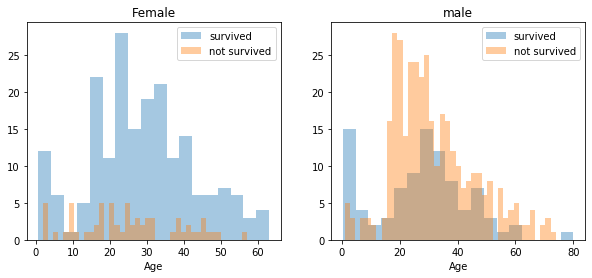

In [74]:
survived = 'survived'
not_survived = 'not survived'
fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(10,4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title('male')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


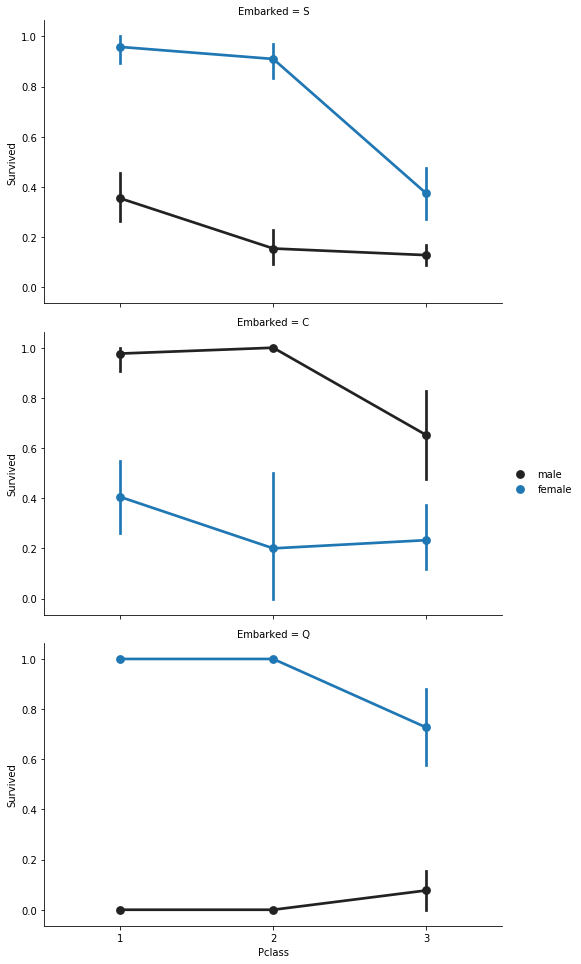

In [75]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

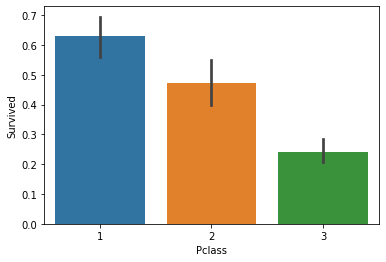

In [76]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

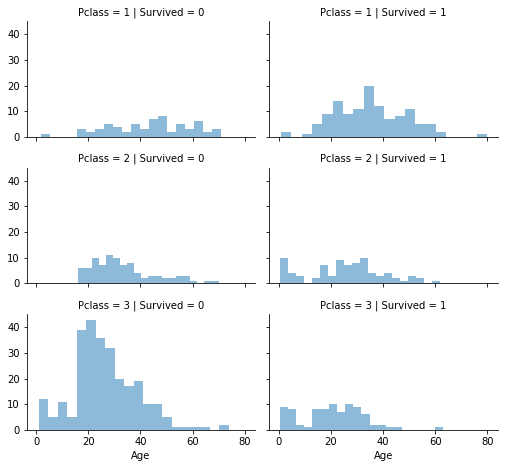

In [77]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [78]:
data = [train_df,test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0,'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0,'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


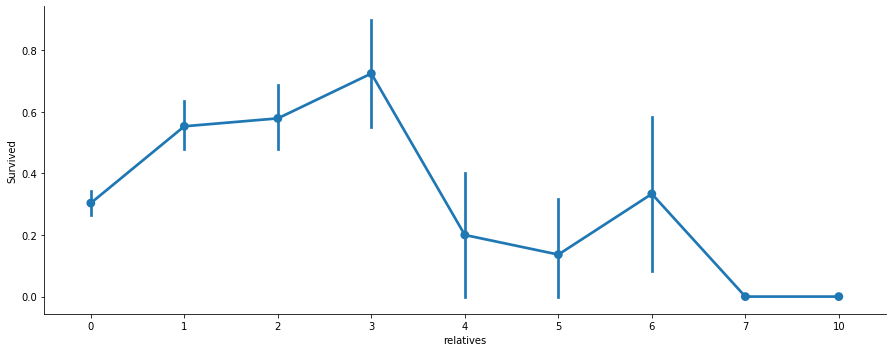

In [79]:
axes = sns.factorplot('relatives','Survived', data=train_df, aspect = 2.5, )

In [80]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [81]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [82]:
most_common = 'S'
data = [train_df,test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_common)

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        714 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Cabin      204 non-null    object 
 10  Embarked   891 non-null    object 
 11  relatives  891 non-null    int64  
 12  not_alone  891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 87.1+ KB


In [84]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [85]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [87]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1,8


In [88]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1,8


In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [90]:
data = [train_df,test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Name       891 non-null    object
 3   Sex        891 non-null    object
 4   Age        891 non-null    int32 
 5   SibSp      891 non-null    int64 
 6   Parch      891 non-null    int64 
 7   Ticket     891 non-null    object
 8   Fare       891 non-null    int32 
 9   Embarked   891 non-null    object
 10  relatives  891 non-null    int64 
 11  not_alone  891 non-null    int32 
 12  Deck       891 non-null    int32 
dtypes: int32(4), int64(5), object(4)
memory usage: 76.7+ KB


In [92]:
genders = {'male' : 0,'female' : 1}
data = [train_df,test_df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [93]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Name       891 non-null    object
 3   Sex        891 non-null    int64 
 4   Age        891 non-null    int32 
 5   SibSp      891 non-null    int64 
 6   Parch      891 non-null    int64 
 7   Ticket     891 non-null    object
 8   Fare       891 non-null    int32 
 9   Embarked   891 non-null    object
 10  relatives  891 non-null    int64 
 11  not_alone  891 non-null    int32 
 12  Deck       891 non-null    int32 
dtypes: int32(4), int64(6), object(3)
memory usage: 76.7+ KB


In [94]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [95]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [96]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Name       891 non-null    object
 3   Sex        891 non-null    int64 
 4   Age        891 non-null    int32 
 5   SibSp      891 non-null    int64 
 6   Parch      891 non-null    int64 
 7   Fare       891 non-null    int32 
 8   Embarked   891 non-null    int64 
 9   relatives  891 non-null    int64 
 10  not_alone  891 non-null    int32 
 11  Deck       891 non-null    int32 
dtypes: int32(4), int64(7), object(1)
memory usage: 69.7+ KB


In [98]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int32
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int32
 7   Embarked   891 non-null    int64
 8   relatives  891 non-null    int64
 9   not_alone  891 non-null    int32
 10  Deck       891 non-null    int32
 11  Title      891 non-null    int64
dtypes: int32(4), int64(8)
memory usage: 69.7 KB


In [100]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train_df['Age'].value_counts()

4    167
6    160
5    144
3    134
2    125
1     93
0     68
Name: Age, dtype: int64

In [101]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,13,0,0,1,8,5
887,1,1,1,2,0,0,30,0,0,1,2,2
888,0,3,1,4,1,2,23,0,3,0,8,2
889,1,1,0,3,0,0,30,1,0,1,3,1


In [102]:
pd.qcut(train_df.Fare,q=6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

In [103]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [104]:
data = [train_df,test_df]
for dataset in data:
    dataset['Age_class'] = dataset['Age'] * dataset['Pclass']

In [105]:
data = [train_df,test_df]
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives'] + 1)
    dataset['Fare_Per_Person']=dataset['Fare_Per_Person'].astype(int)

In [106]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [107]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()

In [108]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [109]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train,y_train)
acc_random_forest = round(random_forest.score(X_train,y_train) * 100, 2)

In [110]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,y_train) * 100, 2)

In [111]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [112]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [113]:
linear_svc = LinearSVC(max_iter=100000)
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

In [114]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [115]:
results = pd.DataFrame({ 'Model':['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'], 
                        'Score':[acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score',ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.82,Random Forest
92.82,Decision Tree
86.76,KNN
81.82,Logistic Regression
81.71,Support Vector Machines
77.67,Naive Bayes


In [116]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.83146067 0.76404494 0.82022472 0.85393258 0.86516854
 0.85393258 0.7752809  0.86516854 0.85393258]
Mean: 0.8238701622971286
Standard Deviation: 0.04098795364641191


In [117]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.183
Sex,0.180
Age_class,0.101
Deck,0.090
Age,0.075
Pclass,0.074
Fare,0.072
Embarked,0.056
relatives,0.053


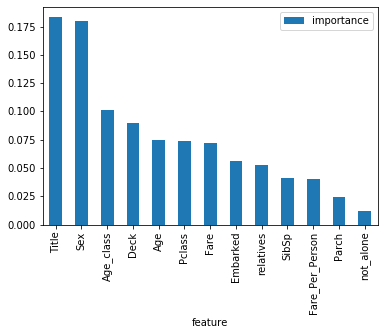

In [118]:
importances.plot.bar()

In [119]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [120]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.82 %


In [121]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.04 %


param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.bestparams

In [149]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 3, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='sqrt',
                                       max_depth=6,
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.83 %


In [123]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[489,  60],
       [ 90, 252]], dtype=int64)

In [124]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.8076923076923077
Recall: 0.7368421052631579


In [125]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9428466430192055


In [150]:
submissions = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':y_prediction})
submissions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [151]:
submission['Survived'].value_counts()

0    271
1    147
Name: Survived, dtype: int64

In [147]:
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 1.csv


In [148]:
random_forest.s

TypeError: score() missing 1 required positional argument: 'y'

In [ ]:
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

In [166]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,...
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_s

In [167]:
submissions = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':grid_search.predict(X_test)})
submissions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [169]:
submissions['Survived'].value_counts()

0    285
1    133
Name: Survived, dtype: int64

In [168]:
filename = 'Titanic Predictions 3.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 3.csv
